In [ ]:
#Loading Necessary Packages
# This is used to access Python interactive environment. This way we can feed input and receive output as we code.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd #this package will be used for managing dataframes and excel sheets
import numpy as np  #this package will be used to perform math functions

# Types of Plots

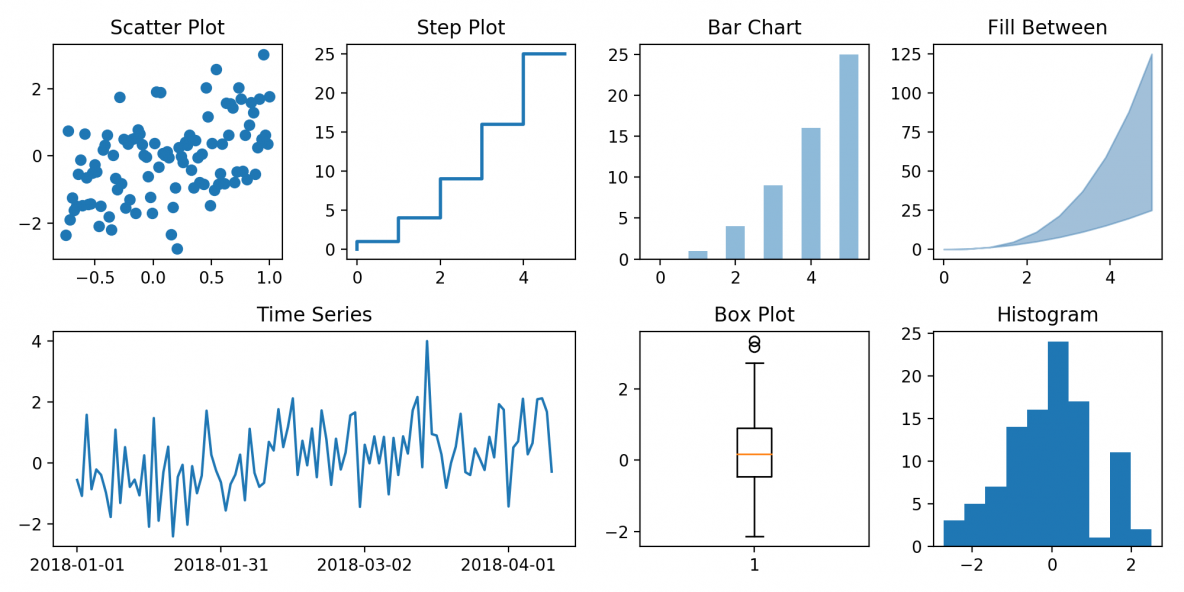

# Installing Packages: Matplotlib



In [ ]:
import matplotlib.pyplot as plt

# Plotting Time Series:

Graphing can be very useful as it helps you to visualize the data that you are working with.

We are specifically going to return to some data that we saw before.

For example, consider **REM_Baseline_Practice.xslx**. This dataset contains raw EEG signals recorded during REM sleep. We can graph them to see how the signal signal looks like or/and changes over time.

In [ ]:
# Load the EEG data from the Excel file
eeg_df = pd.read_excel("REM_Baseline_Practice.xlsx", sheet_name= 0)

# Rename the column for clarity
eeg_df.columns = ["EEG_Signal"]

# Plot the EEG signal
plt...(figsize=(10,4)) # set figure size
plt...(eeg_df["EEG_Signal"], color="black")
plt...("EEG Data (REM Baseline Example)") # add a title
plt...("Time (sample points)") # label x-axis
plt...("EEG Signal (a.u.)") # label y-axis
plt...(True)
plt...()  # display the plot

We can do the same with our **EMG_Values** data set as well!

In [ ]:
# --- Load and clean the data ---
file_path = "EMG_values.xlsx"   # Read the Excel sheet into a DataFrame
raw_emg = pd.read_excel(file_path, sheet_name=0)

# Keep only numeric data rows (skip metadata)
emg_data = raw_emg.iloc[5:].copy() #Skip the first 5 rows (metadata) and keep the actual numeric data
emg_data.columns = ["Index", "Time_s", "EMG_Signal"] #Rename the columns so they are easier to understand
emg_data = emg_data.reset_index(drop=True) # Reset the index to start from 0 again

# --- Choose a range to plot ---
start = 0     # first point
end = 200     # up to 200th point
subset = emg_data.iloc[start:end] #Extract only that slice of the data

# --- Plot the chosen range ---
plt.figure(figsize=(10,4)) # set figure size
plt.plot(subset["Time_s"], subset["EMG_Signal"], color="...")  # plot EMG vs time
plt.title(f"EMG Data from point {start} to {end}") # add a title
plt.xlabel("Time (s)") # label x-axis
plt.ylabel("EMG Signal (a.u.)")
plt.grid(...) # add gridlines
plt.show()  # display the plot


# Plotting Box Plots

One of the most common graphs you see in papers are **box plots (for example, box and whiskers)**.

Why? Because they are a very **simple and powerful** way to show how your data are distributed and whether there are any changes between groups.

- The box shows where most of your data points fall (the interquartile range).

- The line in the middle shows the median or average of your data.

- The whiskers show the spread of your data (minimum and maximum, or up to 1.5× IQR depending on the convention).

- Any dots outside the whiskers are outliers, which can be very important to see.



# Loading Narcoleptic vs. Wild-Type Data

In Tutorial 2, we worked with data that compared narcoleptic mice to control mice. This dataset was organized into a DataFrame we called: **percent_df_with_group_names**

We’ll use this dataset to make simple but powerful graphs (like **box plots**) to compare the two groups. These plots will help us visualize whether narcoleptic mice truly spend different amounts of time in each state compared to controls.\

Sometimes the dataset we need has already been created or saved in another Jupyter Notebook. Instead of re-running all the code that generated it, we can simply load it from the other notebook’s storage. Jupyter has a built-in command called **%store** that lets us save variables and then retrieve them later, even in a different notebook. 

For example, if we previously saved our DataFrame using **%store percent_df_with_group_names**, we can now bring it back into the current notebook by typing **%store -r percent_df_with_group_names**. This way, we can reuse data across notebooks without repeating the whole preprocessing pipeline.

- Copy this to Tutorial 2 Notebook: %store percent_df_with_group_names

In [ ]:
%store -r percent_df_with_group_names
percent_df_with_group_names

# Installing Packages: Seaborn

We will use a different library called **Seaborn** to make these boxplots. Seaborn is built on top of matplotlib, but it is designed specifically for data visualization with some statistics. For example, we can use **seaborn** to compare groups, highlight outliers, and even combine plots with built-in statistical summaries (like means or confidence intervals). This makes it especially useful when we want to understand not just how the data looks, but also what it means statistically.

In [ ]:
import seaborn as sns # this package will be used to add aesthetics for data visualization 
!pip install seaborn

In [ ]:
NarcolepticvsWT = sns.catplot(data = percent_df_with_group_names,
                      x = "Group", y = "WAKE",                       
                      kind = "", # make a boxplot #kind = "violin" as another example
                      hue = "Group",   
                      palette = {"Narcoleptic":"#E41A1C", "Wild-Type": "#377EB8"}, #set color for each group
                      linewidth=3 #set line width
                      
                      
                     )


            
NarcolepticvsWT.map_dataframe(sns.swarmplot, data = percent_df_with_group_names,
                      x = "Group", 
                      y = "WAKE", 
                      hue = "mouseID",        # split the points by mouseID
                      palette="dark:black",     # color points in black
                      size=10   )                # et the size of points  

NarcolepticvsWT.set_axis_labels("Condition", "Time spent in Wakefulness (%)")
#plt.ylim(0, 100)
#plt.show()

# Statistics in Python:

The last step in our data exploration journey is **performing statistical analysis**. This is where we test whether the differences we see between our groups are actually meaningful, or if they might have happened just by chance. We can calculate these tests directly in Python.

You can use this chart to guide you for the future:



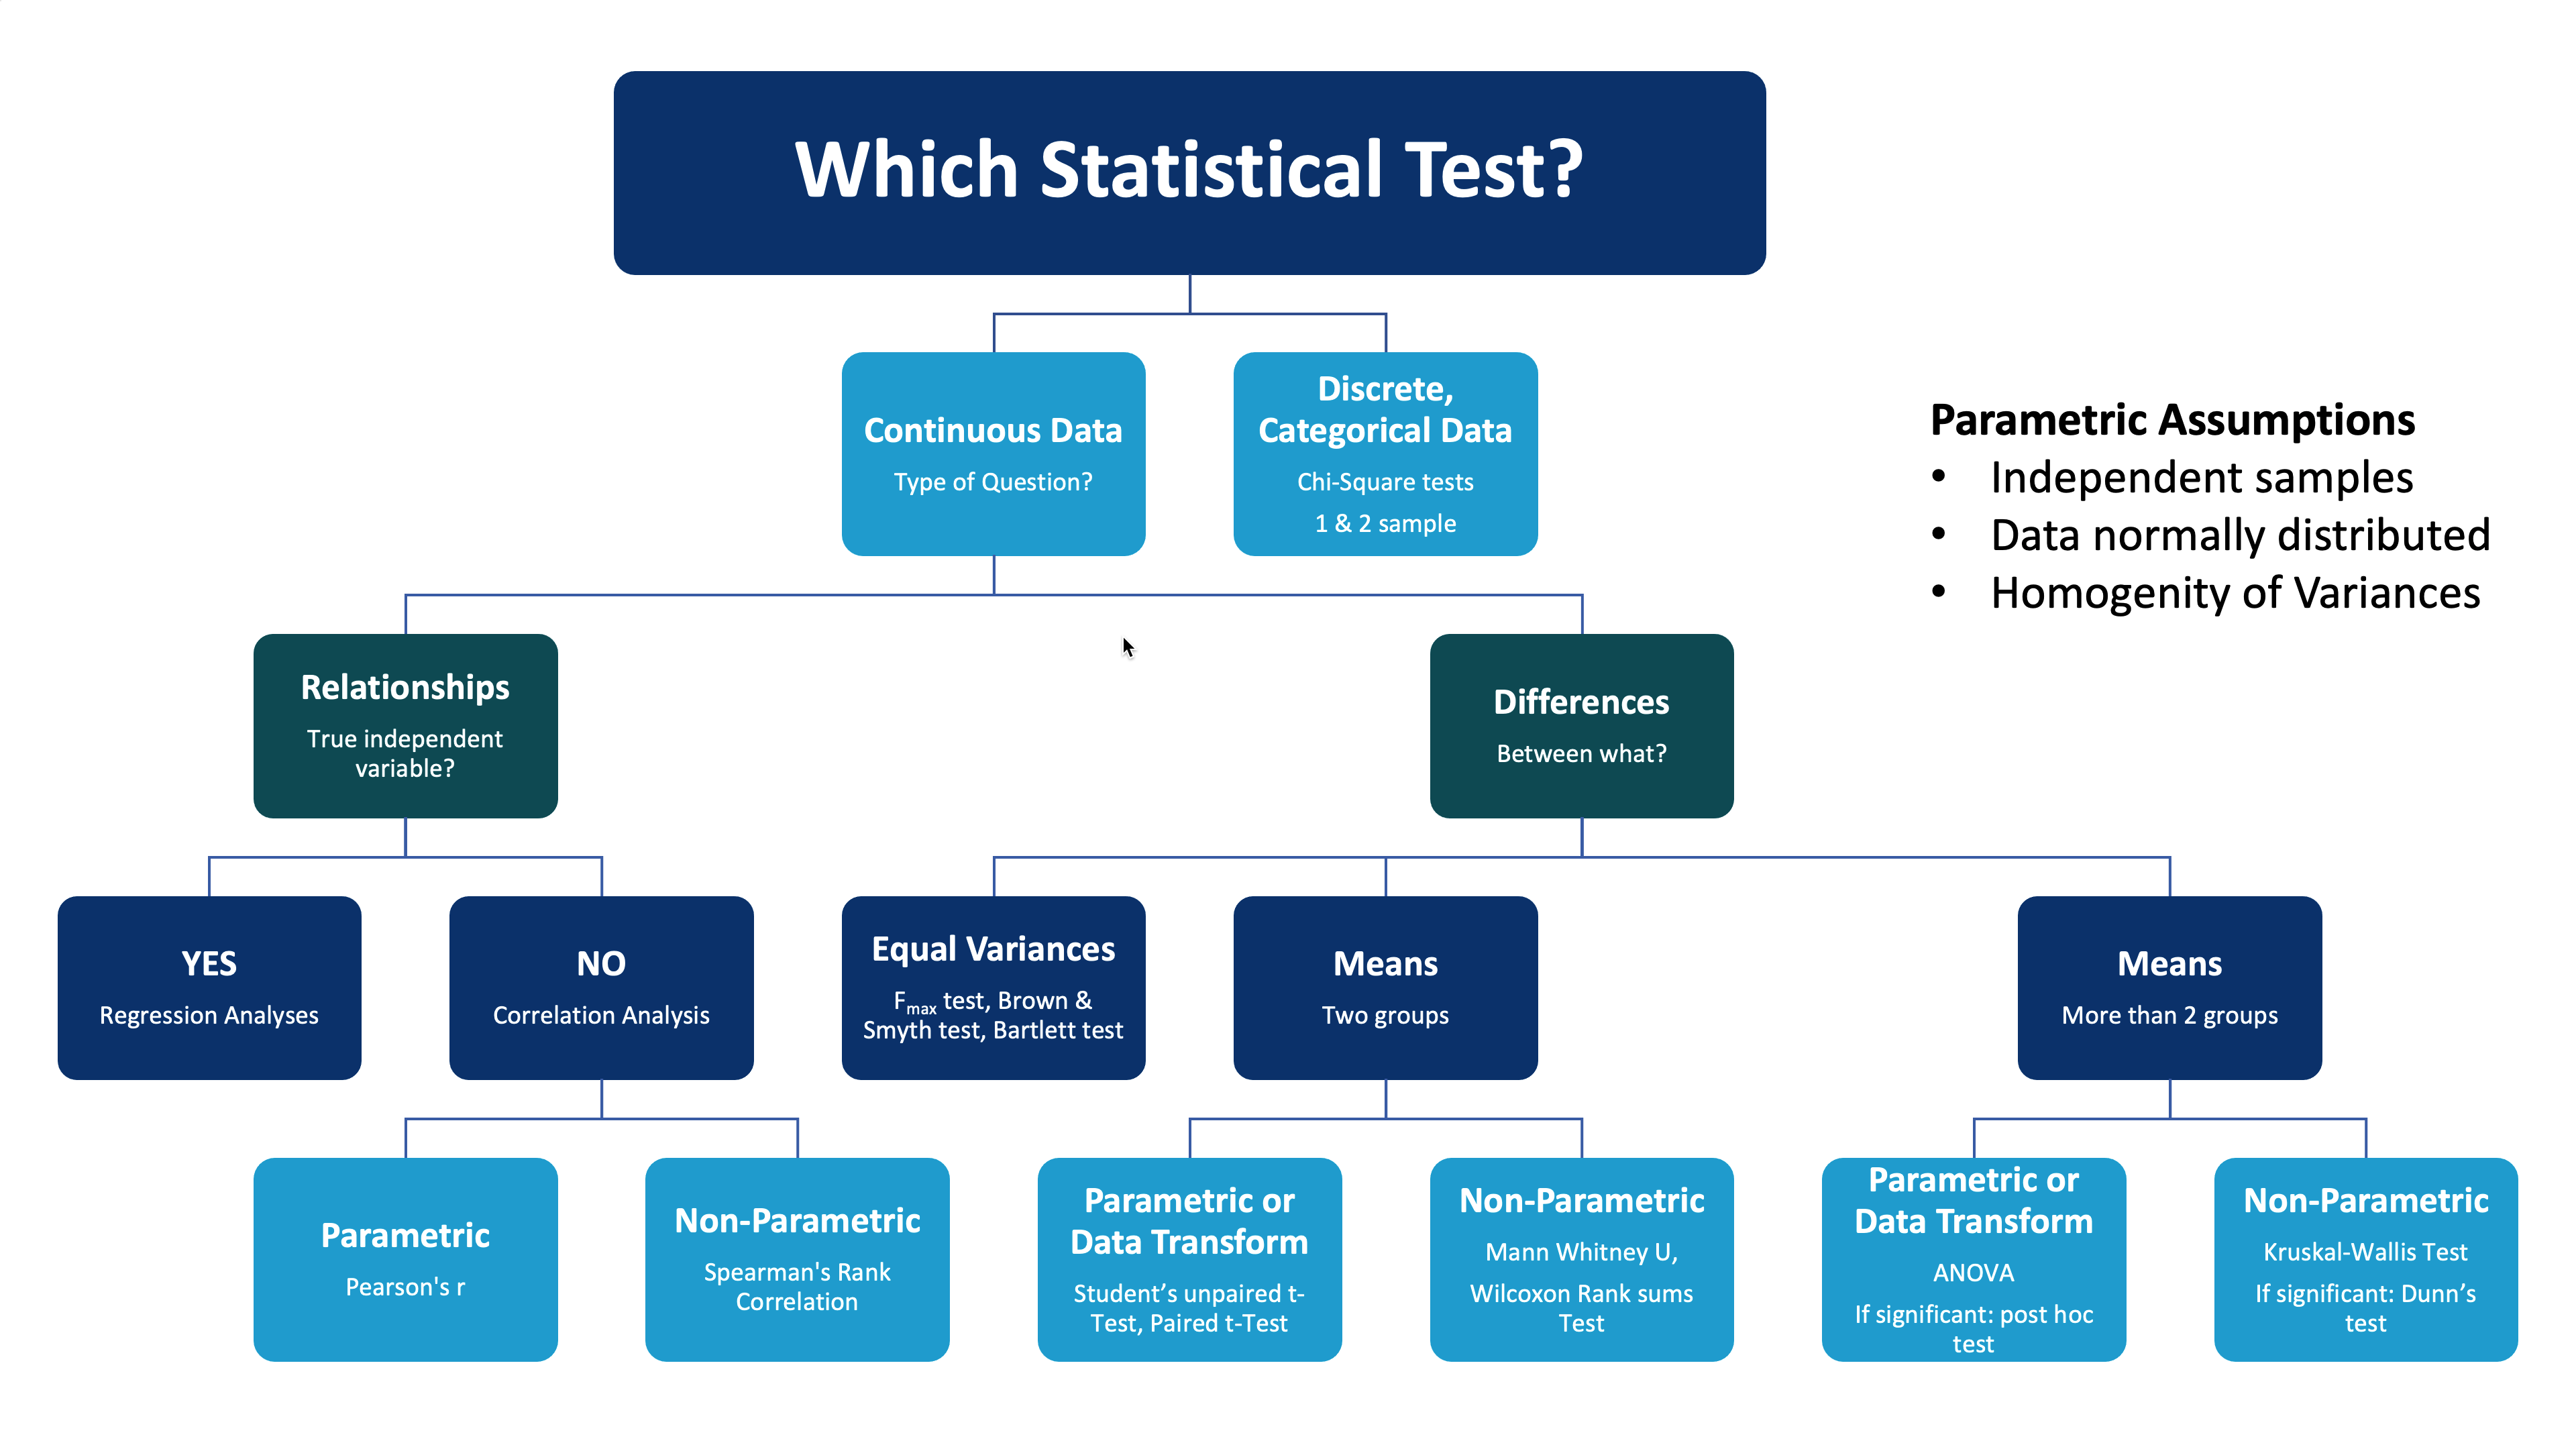

https://ocw.tudelft.nl/course-readings/4-2-5-selecting-a-statistical-method/

# Subset Our Data for Statistical Analysis:

In [ ]:
#Select Column of Data with Loc 

narcoleptic = percent_df_with_group_names...[percent_df_with_group_names.Group == "Narcoleptic", "WAKE"]

wt = percent_df_with_group_names...[percent_df_with_group_names.Group == "Wild-Type", "WAKE"]

narcoleptic
wt

In [ ]:
from scipy import stats #this package will be used for statistical analysis 

In [ ]:
t_stat, p_value = stats...(narcoleptic, wt, equal_var = False)
print("p-value is ", ...)

# How to interpret statistical analysis?

In research, we often use a threshold of p < 0.05 to decide whether an effect is considered statistically significant.

- If **p < 0.05** → we say the difference is statistically significant, meaning it is unlikely to have occurred by chance.

- If **p ≥ 0.05** → we say the difference is not statistically significant, meaning we don’t have enough evidence to conclude there’s a real effect.

When we compare the percent of time spent awake between narcoleptic and wild-type mice using an unpaired t-test:

- **Narcoleptic mice** (n = 3): average ≈ 43% wake

- **Wild-type mice** (n = 8): average ≈ 51.5% wake

- **Difference**: about 8% lower in narcoleptic mice

However, the p-value > 0.05, which means this result is not statistically significant.



## Why is it not significant?

The narcoleptic group is very small (n=3) → too little power to detect subtle differences.

The wild-type group is highly variable (33% → 74%) → large variance makes it harder to find clear group separation.

# How to results from statistical analysis to our plot? 



In [ ]:
!pip install statannotations
from statannotations.Annotator import Annotator

Working with Annotator:

1) Create an Annotator object where:

annotator = Annotator(plot_name, pairs, data= your_data_frame, x="", y="", order=order)

- **plot_name** = the Seaborn/Matplotlib plot you already made.

- **pairs** = tells it which groups to compare (e.g., "Wild-Type" vs "Narcoleptic").

- **data** = your DataFrame with the values.

- **x="", y=""** = which columns hold the groups and the variable you’re testing.

- **order** = makes sure the groups are shown in the correct order on the x-axis.

2) Set up which test will be run and how the result will be shown

annotator.configure(test="", text_format="", loc="")

- **test=" "** = input the name of your statistical test.

- **text_format="star"** → show stars instead of raw p-values (ns, *, **, ***). (text_format="simple" for raw p-values)

- **loc="outside/inside"** → place the stars above the bar connecting the groups.

3) Run the test and draw the annotation (the horizontal line + stars) on your plot. 

annotator.apply_and_annotate()

In [ ]:
# Use your existing DataFrame: percent_df_with_group_names
# Assumes columns: "Group" (values: "Wild-Type", "Narcoleptic") and "WAKE" (percent)
graphing_df_with_stats = percent_df_with_group_names.dropna(subset=["Group", "WAKE"]).copy()

# Optional: enforce group order (WT first, Narco second)
order = ["...", "..."]

plt.figure(figsize=(6,4))
wt_narcoleptic_data_plot = sns.boxplot(
    data=..., x="Group", y="WAKE",
    hue = "Group",
    order=order,
    palette={"Narcoleptic":"#E41A1C", "Wild-Type":"#377EB8"},
    linewidth=2
)

# Define which groups to compare (must match x labels)
pairs = [(order[0], order[1])]

# Automatic stats + annotation (Independent (t-test_ind) t-test; prints stars)
annotator = Annotator(.., pairs, data=.., x="Group", y="WAKE", order=order)
annotator.configure(test="..", text_format="..", loc="..")
annotator.apply_and_annotate()

# Axes cosmetics
wt_narcoleptic_data_plot.set_ylabel("Percent Time Awake (%)")
plt.title("Figure 1 (A): Time Spent (%) in Wakefulness across Wild-Type and Narcoleptic Mice", 
          fontsize=11, fontweight="bold")

#plt.tight_layout()
plt.show()



# Once you are done, you can also save your plot:

In [ ]:
# Save the plot
plt...("wt_narcoleptic_data_plot.png", 
            format = "png", 
            dpi = 300
           )

# Cheat Codes For other Plot Types:

- **Scatter Plots:**

MatplotLib: plt.scatter(["x"], ["y"], label=g, alpha=0.8)

Seaborn: sns.scatterplot(data=df, x="x", y="y", hue="group")

- **Histogram Plots:**

MatplotLib: plt.hist(df[""], bins=, alpha=)

Seaborn: sns.histplot(data=df, x="value", bins=30, kde=True)

- **Heatmap (e.g., correlation)**

MatplotLib:
M = df[["num1","num2"]].corr().values
plt.imshow(M, aspect="auto")


Seaborn:
corr = df.select_dtypes("number").corr()
sns.heatmap(corr, annot=False)  # set annot=True to show numbers

- **Bonus: Plotting your FFT Graphs**

plt.plot(freqs, power)

plt.title("FFT Power"); plt.xlabel("Frequency (Hz)"); plt.ylabel("Power"); plt.tight_layout(); plt.show()



# Wrapping Up Section One:

With that, we are going to wrap up my section of these coding tutorials. You worked with a brand-new complex datasets (and survived!). I know it may have felt overwhelming to work with data you’ve never seen before, but I want to assure you that everyone is doing great.

The goal of these tutorials is to help you learn how to use Python and online tools so you can eventually create your own analyses. With practice, it will only get easier and more intuitive. 

Just think about how far you’ve already come: you can now load datasets, perform complex calculations like FFTs, build your own DataFrames, and create meaningful graphs. These are powerful skills that will be extremely useful later on. Especially if you decide to go to graduate school or continue in research.

Good luck and happy coding! :) 